In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
import numpy as np

In [45]:
import pandas as pd

In [84]:
df1 = pd.read_csv('//Users/evierangelova/Dropbox/Mac/Desktop/gabibot/KPI Index.csv')
print(df1.head())

                                           KPI index
0  Automation Conversation = conversations fully ...
1  Meaningful Drop-off = bot understand customer’...
2  Not Understood Drop-off = bot does not underst...
3  Planned Escalation = no self-service solution ...
4  Reopen + escalation (thank you) = customer reo...


In [85]:
dfw1 = pd.read_csv('//Users/evierangelova/Dropbox/Mac/Desktop/gabibot/KPIs 14.-20.8..csv')
print(dfw1.head())

                      Unnamed: 0 Conversation Language Unnamed: 2
0  Automation Conversation Count               Unknown          0
1                            NaN                German        338
2                            NaN               English      1,598
3                            NaN                French        408
4                            NaN               Italian        465


In [86]:
dfw1p = pd.read_csv('//Users/evierangelova/Dropbox/Mac/Desktop/gabibot/Predicted Intent 14.-20.8..csv')
print(dfw1.head())

                      Unnamed: 0 Conversation Language Unnamed: 2
0  Automation Conversation Count               Unknown          0
1                            NaN                German        338
2                            NaN               English      1,598
3                            NaN                French        408
4                            NaN               Italian        465


In [87]:
dfw2 = pd.read_csv('//Users/evierangelova/Dropbox/Mac/Desktop/gabibot/KPIs 21.-28.8..csv')
print(dfw1.head())

                      Unnamed: 0 Conversation Language Unnamed: 2
0  Automation Conversation Count               Unknown          0
1                            NaN                German        338
2                            NaN               English      1,598
3                            NaN                French        408
4                            NaN               Italian        465


In [88]:
dfw2p = pd.read_csv('//Users/evierangelova/Dropbox/Mac/Desktop/gabibot/Predicted Intent 21.-28.8..csv')
print(dfw1.head())

                      Unnamed: 0 Conversation Language Unnamed: 2
0  Automation Conversation Count               Unknown          0
1                            NaN                German        338
2                            NaN               English      1,598
3                            NaN                French        408
4                            NaN               Italian        465


In [89]:
print(dfw1p.columns)

Index(['Intent Name', 'Total Conversations', 'Automation Conversation Count',
       'Automation Rate', 'Meaningful Drop off Count',
       'Meaningful Drop off Rate', 'Not Understood Drop off Count',
       'Not Understood Drop off Rate', 'Planned Escalation Count',
       'Planned Escalation Rate', 'Reopen + escalation (other) Count',
       'Reopen + escalation (other) Rate',
       'Reopen + escalation (thank you) Count',
       'Reopen + escalation (thank you) Rate', 'Failed Escalation Count',
       'Failed Escalation Rate', 'Not Resolved Count', 'Not Resolved Rate',
       'Informed + No Status Count', 'Informed + No Status Rate',
       'Initial Failed Escalation to Agent Escalation Count',
       'Initial Failed Escalation to Agent Escalation Rate', 'Others Count',
       'Other Rate'],
      dtype='object')


In [101]:
dfw1p = dfw1p.loc[dfw1p['Intent Name'] != 'Total']

In [102]:
dfw2p = dfw2p.loc[dfw2p['Intent Name'] != 'Total']

In [103]:
dfw1p['Meaningful Drop off Rate'] = dfw1p['Meaningful Drop off Rate'].str.replace('%', '').astype(float)

In [104]:
dfw1p_sorted = dfw1p.sort_values('Meaningful Drop off Rate', ascending=False).head(5)

In [106]:
print(dfw1p_sorted[['Intent Name', 'Meaningful Drop off Rate']])

                 Intent Name  Meaningful Drop off Rate
33               How to book                     34.88
6              Meeting point                     34.60
12  Running Late to activity                     30.16
21                    Images                     28.57
19          Technical issues                     28.49


In [107]:
dfw2p['Meaningful Drop off Rate'] = dfw2p['Meaningful Drop off Rate'].str.replace('%', '').astype(float)

In [108]:
dfw2p_sorted = dfw2p.sort_values('Meaningful Drop off Rate', ascending=False).head(5)

In [109]:
print(dfw2p_sorted[['Intent Name', 'Meaningful Drop off Rate']])

                                      Intent Name  Meaningful Drop off Rate
6                                   Meeting point                     35.09
33                                    How to book                     34.88
14                       Running Late to activity                     31.22
12  Description Itinerary & Inclusions Exclusions                     30.69
26                              Activity language                     27.63


In [140]:
dfw1p['Automation Rate'] = dfw1p['Automation Rate'].str.replace('%', '').astype(float)

In [141]:
dfw2p['Automation Rate'] = dfw2p['Automation Rate'].str.replace('%', '').astype(float)

In [142]:
top5_automated_week1 = dfw1p.sort_values('Automation Rate', ascending=False).head(5)

In [143]:
top5_automated_week2 = dfw2p.sort_values('Automation Rate', ascending=False).head(5)

In [144]:
print(top5_automated_week1[['Intent Name', 'Automation Rate']])

                  Intent Name  Automation Rate
31           Supplier contact            46.55
10         Changes to booking            35.49
12   Running Late to activity            32.36
20  Confirm upcoming activity            30.20
30                    Invoice            28.81


In [145]:
print(top5_automated_week2[['Intent Name', 'Automation Rate']])

                  Intent Name  Automation Rate
31           Supplier contact            62.96
14   Running Late to activity            36.20
30                    Invoice            35.38
10         Changes to booking            33.78
18  Confirm upcoming activity            32.54


In [147]:
overlapping_intents_week1 = set(top5_automated_week1['Intent Name']).intersection(set(dfw1p_sorted['Intent Name']))

In [148]:
overlapping_intents_week2 = set(top5_automated_week2['Intent Name']).intersection(set(dfw2p_sorted['Intent Name']))

In [149]:
print(f"Overlapping Intents for Week 1: {overlapping_intents_week1}")

Overlapping Intents for Week 1: {'Running Late to activity'}


In [150]:
if overlapping_intents_week1:
    print("\nFor Week 1, the following intents are both highly automated and have high drop-off rates:")
    print(overlapping_intents_week1)
    print("These intents may require immediate attention.")


For Week 1, the following intents are both highly automated and have high drop-off rates:
{'Running Late to activity'}
These intents may require immediate attention.


In [151]:
if overlapping_intents_week2:
    print("\nFor Week 2, the following intents are both highly automated and have high drop-off rates:")
    print(overlapping_intents_week2)
    print("These intents may require immediate attention.")


For Week 2, the following intents are both highly automated and have high drop-off rates:
{'Running Late to activity'}
These intents may require immediate attention.


In [191]:
dfw1p['Total Conversations'] = dfw1p['Total Conversations'].str.replace(',', '').astype(int)

In [164]:
most_common_week1 = dfw1p.sort_values('Total Conversations', ascending=False).head(5)

In [165]:
print(most_common_week1[['Intent Name', 'Total Conversations']])

                        Intent Name  Total Conversations
36                            Total                27987
0           Cancellations & Refunds                 4091
1                             Hello                 3698
2                         No Intent                 3556
3   Pickup and drop-off information                 2008


In [192]:
dfw2p['Total Conversations'] = dfw2p['Total Conversations'].str.replace(',', '').astype(int)

In [167]:
most_common_week2 = dfw2p.sort_values('Total Conversations', ascending=False).head(5)

In [168]:
print(most_common_week2[['Intent Name', 'Total Conversations']])

                        Intent Name  Total Conversations
36                            Total                25095
0           Cancellations & Refunds                 3769
1                             Hello                 3268
2                         No Intent                 3175
3   Pickup and drop-off information                 1772


In [169]:
common_intents = ["Cancellations & Refunds", "Hello", "No Intent"]

In [170]:
common_intents_dfw1p = dfw1p[dfw1p['Intent Name'].isin(common_intents)]

In [171]:
common_intents_dfw2p = dfw2p[dfw2p['Intent Name'].isin(common_intents)]

In [172]:
print(common_intents_dfw1p[['Intent Name', 'Automation Rate']])

               Intent Name  Automation Rate
0  Cancellations & Refunds            10.66
1                    Hello             8.68
2                No Intent             0.00


In [173]:
print(common_intents_dfw2p[['Intent Name', 'Automation Rate']])

               Intent Name  Automation Rate
0  Cancellations & Refunds            10.14
1                    Hello             8.69
2                No Intent             0.00


In [174]:
top5_automated_week1 = dfw1p.sort_values('Automation Rate', ascending=False).head(5)

In [175]:
top5_automated_week2 = dfw2p.sort_values('Automation Rate', ascending=False).head(5)

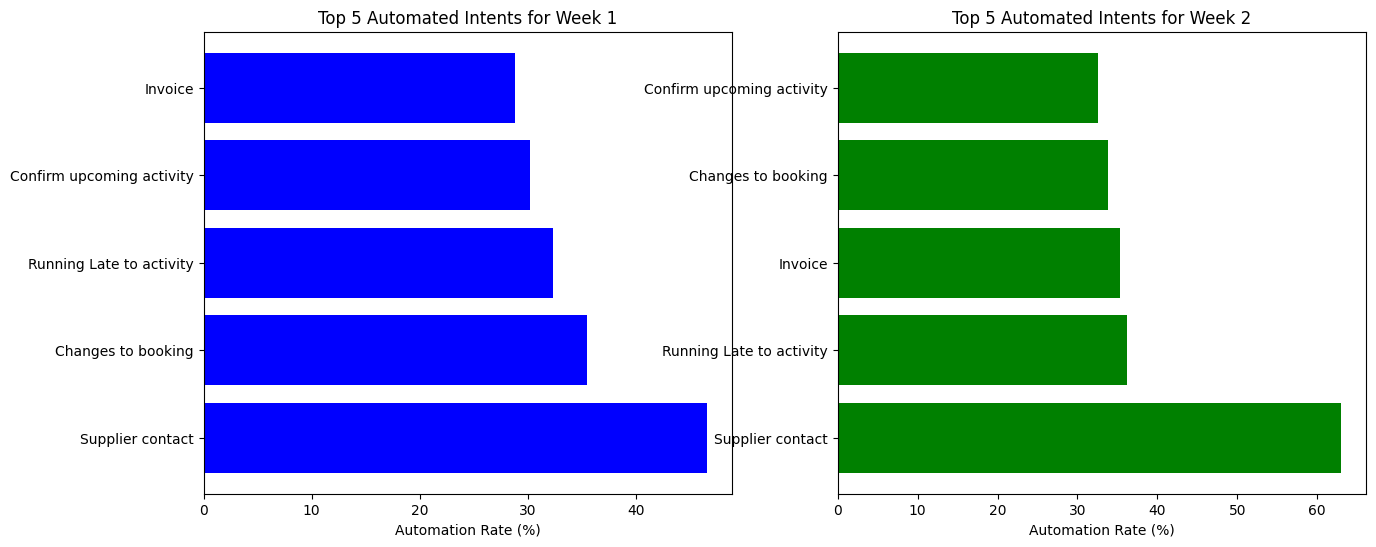

In [176]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].barh(top5_automated_week1['Intent Name'], top5_automated_week1['Automation Rate'], color='blue')
axs[0].set_title('Top 5 Automated Intents for Week 1')
axs[0].set_xlabel('Automation Rate (%)')

axs[1].barh(top5_automated_week2['Intent Name'], top5_automated_week2['Automation Rate'], color='green')
axs[1].set_title('Top 5 Automated Intents for Week 2')
axs[1].set_xlabel('Automation Rate (%)')

plt.show()

In [178]:
top5_dropoff_week1 = dfw1p.sort_values('Meaningful Drop off Rate', ascending=False).head(5)

In [179]:
top5_dropoff_week2 = dfw2p.sort_values('Meaningful Drop off Rate', ascending=False).head(5)

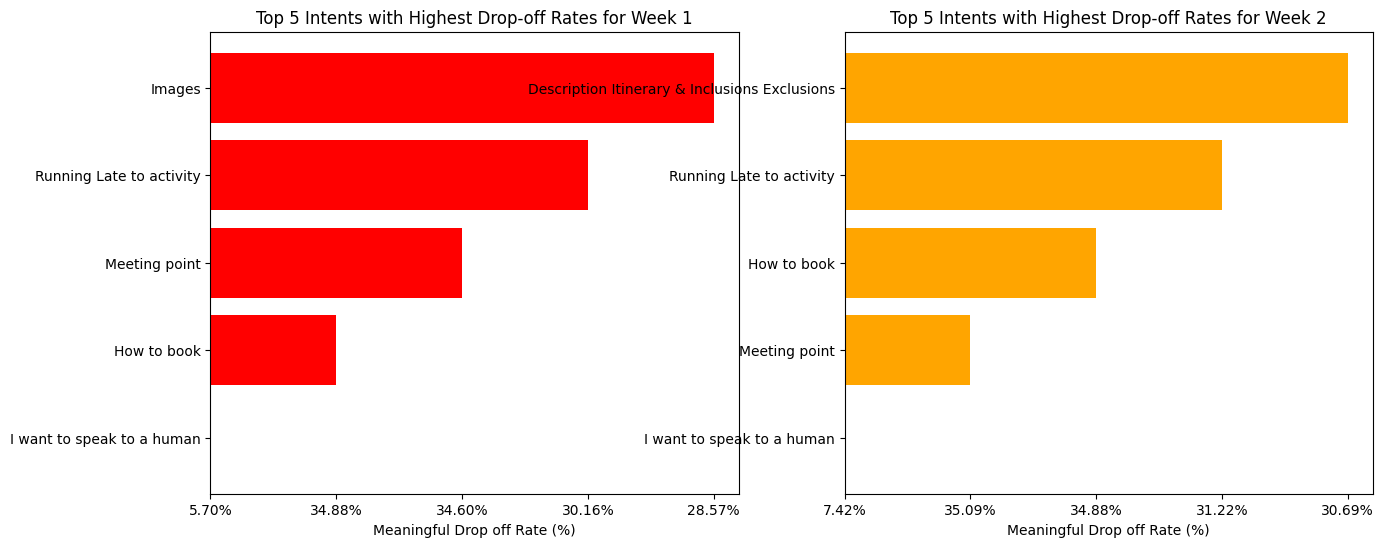

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].barh(top5_dropoff_week1['Intent Name'], top5_dropoff_week1['Meaningful Drop off Rate'], color='red')
axs[0].set_title('Top 5 Intents with Highest Drop-off Rates for Week 1')
axs[0].set_xlabel('Meaningful Drop off Rate (%)')

axs[1].barh(top5_dropoff_week2['Intent Name'], top5_dropoff_week2['Meaningful Drop off Rate'], color='orange')
axs[1].set_title('Top 5 Intents with Highest Drop-off Rates for Week 2')
axs[1].set_xlabel('Meaningful Drop off Rate (%)')

plt.show()

In [193]:
dfw1p = dfw1p[dfw1p['Intent Name'] != 'Total']

In [203]:
dfw2p = dfw2p[dfw2p['Intent Name'] != 'Total']

In [197]:
top5_common_week1 = dfw1p.sort_values('Total Conversations', ascending=False).head(5)

In [204]:
top5_common_week2 = dfw2p.sort_values('Total Conversations', ascending=False).head(5)

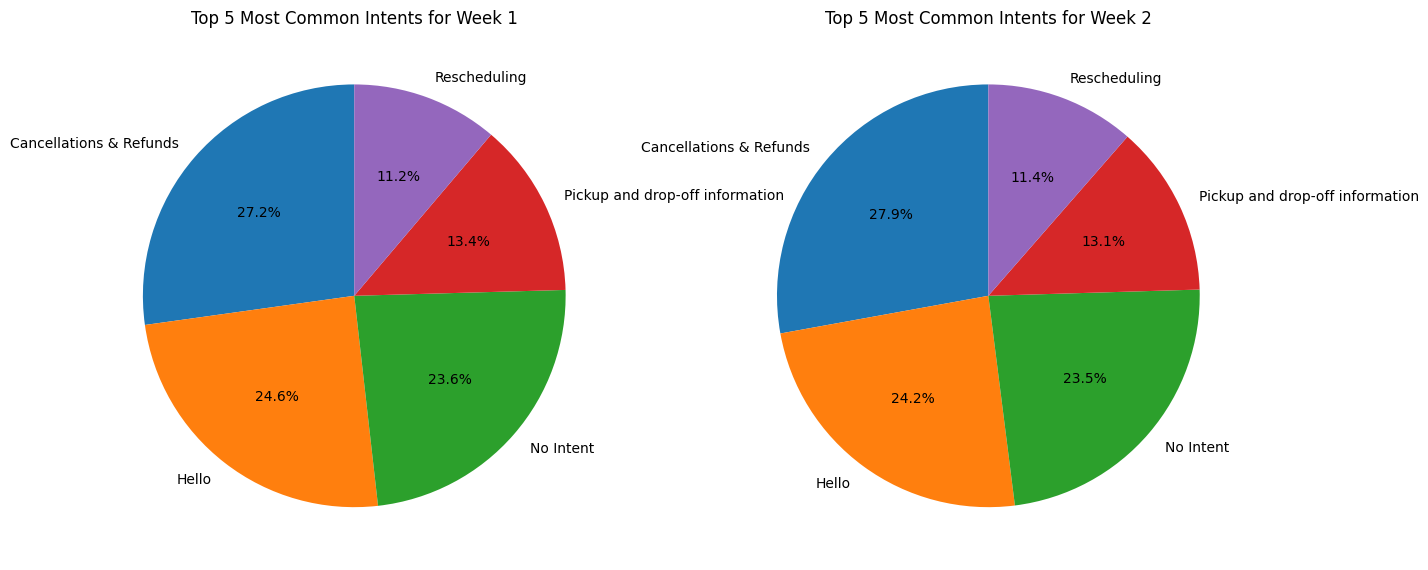

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].pie(top5_common_week1['Total Conversations'], labels=top5_common_week1['Intent Name'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Most Common Intents for Week 1')

axs[1].pie(top5_common_week2['Total Conversations'], labels=top5_common_week2['Intent Name'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Top 5 Most Common Intents for Week 2')

plt.show()

# Percentage Change: Calculate the percentage change in KPIs from the first week to the second.

In [91]:
def clean_percentage(df, columns):
    for col in columns:
        df[col] = df[col].str.replace('%', '').astype(float)
    return df

In [92]:
def calculate_percentage_change(old_value, new_value):
    return ((new_value - old_value) / old_value) * 100

In [93]:
percentage_columns = ['Automation Rate', 'Meaningful Drop off Rate']
dfw1p = clean_percentage(dfw1p, percentage_columns)
dfw2p = clean_percentage(dfw2p, percentage_columns)

In [94]:
avg_kpis_dfw1p = dfw1p[['Automation Rate', 'Meaningful Drop off Rate']].mean()
avg_kpis_dfw2p = dfw2p[['Automation Rate', 'Meaningful Drop off Rate']].mean()

In [95]:
percentage_change = calculate_percentage_change(avg_kpis_dfw1p, avg_kpis_dfw2p)

In [96]:
print("Percentage Change in KPIs from 14-20 Aug to 21-28 Aug:")
print(percentage_change)

Percentage Change in KPIs from 14-20 Aug to 21-28 Aug:
Automation Rate             6.119654
Meaningful Drop off Rate   -2.318022
dtype: float64


# Visual Comparison

In [99]:
import seaborn as sns

In [100]:
def clean_percentage(df, columns):
    for col in columns:
        df[col] = df[col].str.replace('%', '').astype(float)
    return df

In [102]:
percentage_columns = ['Automation Rate', 'Meaningful Drop off Rate']

In [104]:
dfw1p['Week'] = '14-20 Aug'
dfw2p['Week'] = '21-28 Aug'

In [108]:
top_10_intents = combined_df['Intent Name'].value_counts().index[:10]

In [109]:
filtered_df = combined_df[combined_df['Intent Name'].isin(top_10_intents)]

In [110]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cancellations & Refunds'),
  Text(1, 0, 'Technical issues'),
  Text(2, 0, 'Images'),
  Text(3, 0, 'Affirmative'),
  Text(4, 0, 'I have a question'),
  Text(5, 0, 'Reviews'),
  Text(6, 0, 'Negative feedback'),
  Text(7, 0, 'Discount & Pricing'),
  Text(8, 0, 'Activity language'),
  Text(9, 0, 'Follow-up requests')])

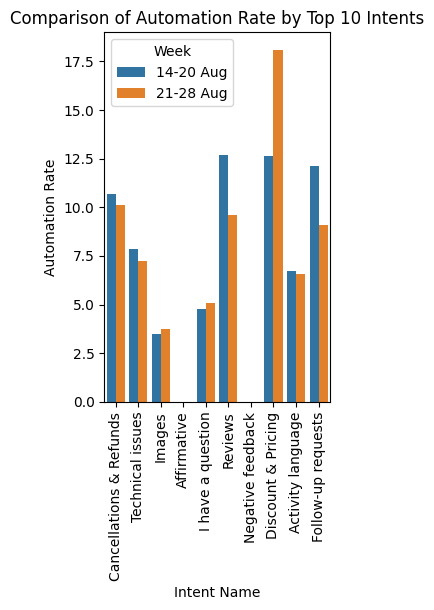

In [111]:
plt.subplot(1, 2, 1)
sns.barplot(x='Intent Name', y='Automation Rate', hue='Week', data=filtered_df)
plt.title('Comparison of Automation Rate by Top 10 Intents')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cancellations & Refunds'),
  Text(1, 0, 'Technical issues'),
  Text(2, 0, 'Images'),
  Text(3, 0, 'Affirmative'),
  Text(4, 0, 'I have a question'),
  Text(5, 0, 'Reviews'),
  Text(6, 0, 'Negative feedback'),
  Text(7, 0, 'Discount & Pricing'),
  Text(8, 0, 'Activity language'),
  Text(9, 0, 'Follow-up requests')])

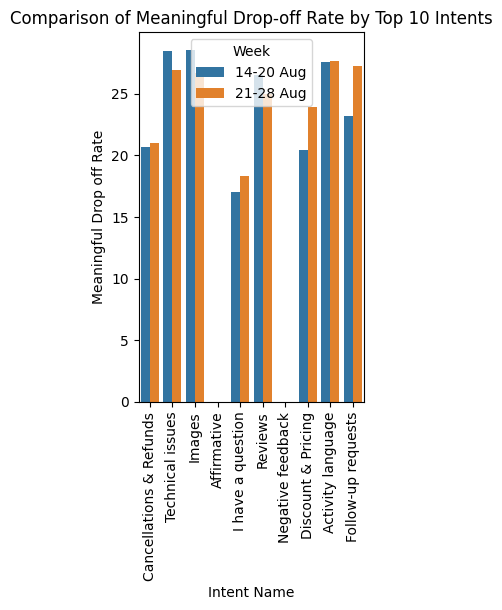

In [112]:
plt.subplot(1, 2, 2)
sns.barplot(x='Intent Name', y='Meaningful Drop off Rate', hue='Week', data=filtered_df)
plt.title('Comparison of Meaningful Drop-off Rate by Top 10 Intents')
plt.xticks(rotation=90)

# Calculate the average values for each KPI for both weeks. This gives us a single number that summarizes performance for that week.

In [115]:
def calculate_weekly_averages(df):
    return df[['Automation Rate', 'Meaningful Drop off Rate']].mean()

In [116]:
weekly_avg_dfw1p = calculate_weekly_averages(dfw1p)
weekly_avg_dfw2p = calculate_weekly_averages(dfw2p)

In [117]:
print("Weekly Averages for 14-20 Aug:")
print(weekly_avg_dfw1p)
print("\nWeekly Averages for 21-28 Aug:")
print(weekly_avg_dfw2p)

Weekly Averages for 14-20 Aug:
Automation Rate             12.233514
Meaningful Drop off Rate    19.704595
dtype: float64

Weekly Averages for 21-28 Aug:
Automation Rate             12.982162
Meaningful Drop off Rate    19.247838
dtype: float64


**Interpretation**: 
The **Automation Rate** has slightly increased over the week, meaning Gabi is becoming more efficient at handling queries on its own. That's a good sign for scalability.
The **Meaningful Drop-off Rate** has decreased, which generally indicates that fewer users are leaving the conversation without getting their issues resolved. This could mean that Gabi is becoming more effective at solving users' problems.